<a href="https://colab.research.google.com/github/najjouj/machine-learning/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [22]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('/content/housing.csv',header=None, delimiter=r"\s+",names=column_names)

In [23]:
data.shape

(506, 14)

In [25]:
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,48.5
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,31.6
236,0.52058,0.0,6.20,1,0.5070,6.631,76.5,4.1480,8,307.0,17.4,388.45,9.54,25.1
66,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337.0,16.1,396.90,10.24,19.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28,18.2
165,2.92400,0.0,19.58,0,0.6050,6.101,93.0,2.2834,5,403.0,14.7,240.16,9.81,25.0
338,0.03306,0.0,5.19,0,0.5150,6.059,37.3,4.8122,5,224.0,20.2,396.14,8.51,20.6
212,0.21719,0.0,10.59,1,0.4890,5.807,53.8,3.6526,4,277.0,18.6,390.94,16.03,22.4
194,0.01439,60.0,2.93,0,0.4010,6.604,18.8,6.2196,1,265.0,15.6,376.70,4.38,29.1
74,0.07896,0.0,12.83,0,0.4370,6.273,6.0,4.2515,5,398.0,18.7,394.92,6.78,24.1


In [27]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [28]:
data.duplicated().sum()

np.int64(0)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [30]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

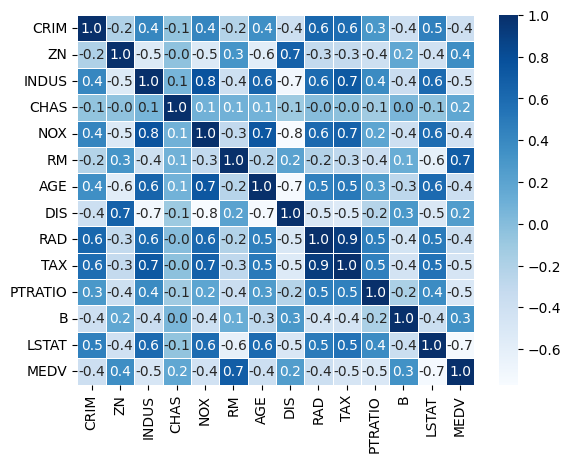

In [35]:
sns.heatmap(data.corr(),annot=True,fmt='.1f',linewidth=.5,cmap='Blues')

##Create Model

In [37]:
y=data.MEDV
x=data.drop('MEDV',axis=1)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [41]:
model1=XGBRegressor()

In [42]:
model1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
pred=model1.predict(x_test)

In [44]:
metric1=r2_score(pred,y_test)
metric1

0.7880529203913165

In [45]:
metric=mean_absolute_error(y_test,pred)
metric

2.294093242346072